# Данные по маммографии

Один из общедоступных наборов данных в архиве Центра машинного обучения [описание](https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass).

Собран в Институте Радиологии университета Эрланген-Нюрнберг, Erlangen, Germany в период между 2003 и 2006 гг.

Маммография является наиболее эффективным методом скрининга рака молочной железы, доступных сегодня.
Однако низкая положительная прогностическая ценность биопсии молочной железы в результате интерпретации маммографии приводит к примерно 70% ненужных биопсий с доброкачественными результатами.
Для снижения количества ненужных биопсий молочных желез предлагаются системы автоматизированной диагностики, которые помогают врачу решить: делать биопсию подозрительного участка или пока отложить инвазивную проверку и понаблюдать.


Колонки:

1. Оценка BI-RADS в диапазоне от 1 (определенно доброкачественная)
   до 5 (очень подозрительно злокачественная), полученная в процессе двойного осмотра врачами. (порядковый)
2. Возраст пациента в годах
3. Форма образования: round=1 oval=2 lobular=3 irregular=4 
4. Край образования: очерченный = 1 мелкодольчатый = 2 расплывчатый = 3 плохо определенный = 4 пальчатый = 5
5. Плотность образования: высокая = 1 изо = 2 низкая = 3 жиросодержащая = 4 (порядковый)
6. Реальная тяжесть: доброкачественная = 0 или злокачественная = 1 (биноминальный)


Первоисточник

> M. Elter, R. Schulz-Wendtland and T. Wittenberg (2007)
    The prediction of breast cancer biopsy outcomes using two CAD approaches that both emphasize an intelligible decision process.
    Medical Physics 34(11), pp. 4164-4172



In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data
kk = 'est age forma krai dens itog'.split()
D = pd.read_csv('mammographic_masses.data', names=kk, header=None, na_values='?')
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
est      959 non-null float64
age      956 non-null float64
forma    930 non-null float64
krai     913 non-null float64
dens     885 non-null float64
itog     961 non-null int64
dtypes: float64(5), int64(1)
memory usage: 45.1 KB


In [3]:
D

,est,age,forma,krai,dens,itog
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
9,5.0,60.0,NaN,5.0,1.0,1


Посмотрим распределение всех четырех предсказывающих показателей.

При этом настроим палитру, чтобы плохой исход был пугающе красным, а хороший - успокаивающе зеленым. (n=2)

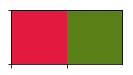

In [4]:
pal = sns.choose_diverging_palette()

C:\a\WinPython\python-3.5.2.amd64\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\a\WinPython\python-3.5.2.amd64\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


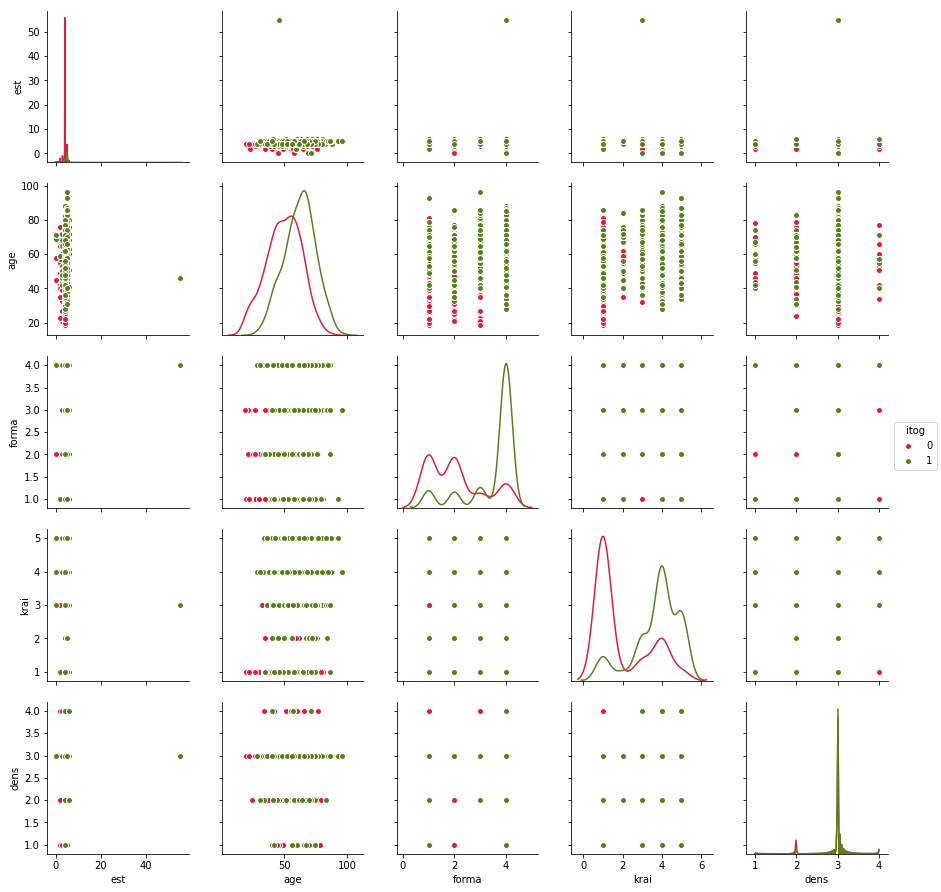

In [5]:
sns.pairplot(data=D, x_vars=D.columns[:-1], y_vars=D.columns[:-1], dropna=False,
    hue="itog", 
    diag_kind="kde", 
    palette=pal);

Видны расхождения по многим признакам, а значит можно настроить прогностическую модель, которая будет предсказывать итог.

Авторами заявлено, что оценка врачей `est` варьирует от 1 до 5. Одно значение 55. Это явно опечатка.

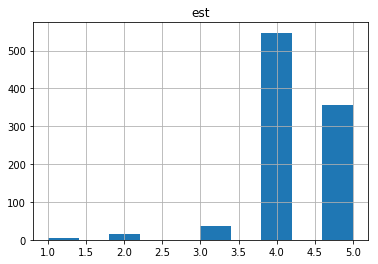

In [6]:
D.loc[D.est>5,'est']=5
D.loc[D.est<1,'est']=1
D.hist('est');

In [7]:
(
    D.est.corr(D.itog),
    D.est.corr(D.itog, 'kendall'),
    D.est.corr(D.itog, 'spearman')
)

(0.53602300513476031, 0.60611471578248766, 0.62136209715869961)

Оценки врачей коррелировали с итоговыми данными биопсии.

## Зависимость от возраста

Чем старше возраст пациентки, тем больше вероятность того, что образование злокачественное.

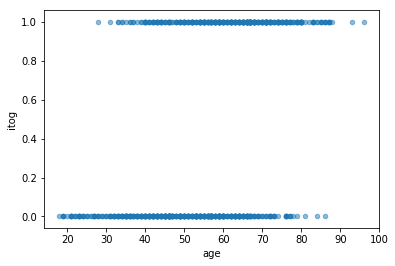

In [8]:
D.plot('age','itog', kind='scatter', alpha=.5);

Диапазоны значительно перекрываются и, например, нельзя одназначно сказать о качестве новообразований у женщин в возрасте 50 лет. Поскольку исходов всего два, то можно говорить о вероятности.

Давайте преобразуем данные в вероятности - долю одного исхода события от общего количества событий.

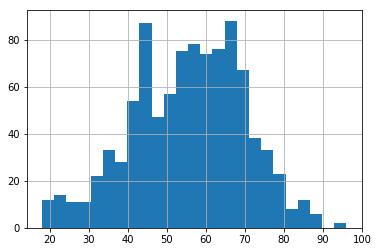

In [9]:
D.age.hist(bins=25);

Следует отметить, что сходство распределения по возрасту с нормальным распределением говорит не о законе распределения признака (как известно возраст начинается с 0), а лишь о том, в каком возрасте у женщин встречаются образования в грудных железах.

Давайте поделим весь диапазон на пятилетки и посчитаем процент злокачественности.

In [10]:
agegroup = np.arange(10,105,5)
D['agegroup'] = pd.cut(D.age, agegroup)

D.groupby(['agegroup']).itog.count()

agegroup
(10, 15]       0
(15, 20]       6
(20, 25]      23
(25, 30]      19
(30, 35]      44
(35, 40]      58
(40, 45]      94
(45, 50]      96
(50, 55]     111
(55, 60]     139
(60, 65]     114
(65, 70]     108
(70, 75]      67
(75, 80]      49
(80, 85]      15
(85, 90]      11
(90, 95]       1
(95, 100]      1
Name: itog, dtype: int64

Самыми многочисленными оказались возрастные группы от 50 до 70 лет. 

Наша задача сгруппировать по двум колонкам и посчитать количество случаев принадлежности к группам в одной и другой колонках.

In [11]:
G = D.groupby(['agegroup','itog']).itog.count().unstack()
G

itog,0,1
agegroup,,
"(15, 20]",6.0,NaN
"(20, 25]",23.0,NaN
"(25, 30]",18.0,1.0
"(30, 35]",38.0,6.0
"(35, 40]",44.0,14.0
"(40, 45]",66.0,28.0
"(45, 50]",65.0,31.0
"(50, 55]",64.0,47.0
"(55, 60]",77.0,62.0


Заменим отсутствующие значения и подсчитаем общее количество.

In [12]:
G = G.fillna(0).astype(int)
G = G.rename(columns={0:'dobro', 1:'zlo'})

G['N'] = G.dobro + G.zlo
G

itog,dobro,zlo,N
agegroup,,,
"(15, 20]",6,0,6
"(20, 25]",23,0,23
"(25, 30]",18,1,19
"(30, 35]",38,6,44
"(35, 40]",44,14,58
"(40, 45]",66,28,94
"(45, 50]",65,31,96
"(50, 55]",64,47,111
"(55, 60]",77,62,139


Считаем вероятность...

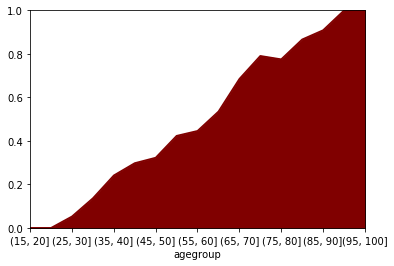

In [13]:
G['p'] = G.zlo/G.N

G.p.plot(kind='area', color='maroon', ylim=(0,1));

Вроде похоже на линейную зависимость вероятности от возраста. Но линейный тренд будет продолжаться вверх и вниз, а вероятность не может быть 120% в возрасте 110 лет или -10% в возрасте 10 лет.
Адекватная модель должна попадать только в диапазон [0, 1].

Нам подходит [логистическая модель](https://en.wikipedia.org/wiki/Logistic_function), описывающая переход от 1 к 0 или обратно.


$$y(x) = { 1 \over 1+e^{-k(x-x_0)} }$$

In [14]:
import scipy.optimize as optimize

In [15]:
def func(x, x0, k):
#     '''https://en.wikipedia.org/wiki/Logistic_function'''
        return 1 / (1 + np.exp(k*(x-x0)))

x = agegroup[:-2]
y = G.p
popt, pcov = optimize.curve_fit(func, x, y)
popt

array([ 50.17868811,  -0.07651541])

Так как в качестве $x$ была нижняя граница пятилетних диапазонов, то, чтобы попасть в середину диапазонов, к полученному значению надо прибавить половину диапазона - 2.5 года.

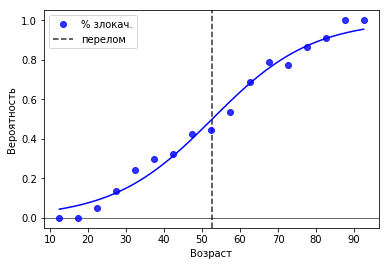

In [19]:
co='b'

plot(x+2.5, y, marker='o', lw=0, color=co, alpha=.8, zorder=3, label='% злокач.')

xx = linspace(x.min(), x.max(), 200)
yy = func(xx, *popt)
plot(xx+2.5,yy, color=co, ls='-', zorder=10);

axvline(popt[0]+2.5, color='k', ls='--', alpha=.8, label='перелом')

axhline(0, color='k', ls='-', lw=1, alpha=.6)

xlabel('Возраст');
ylabel('Вероятность')
legend();

Вывод. После 52.7 лет преобладает вероятность злокачественного исхода новообразований в груди.

А что если попробовать подобрать логистическую модель к исходным данным без подсчета вероятности?

In [20]:
D_ = D[D.age.notnull()] #отберем только с указанием возраста
x = D_.age
y = D_.itog

# зададим в качестве начальных значений полученные ранее
popt, pcov = optimize.curve_fit(func, x, y, p0=[50, -0.07])
popt

array([ 58.52211327,  -0.07062092])

Стандартную ошибку получаем как корень квадратный из вариаций, которые идут по диагонали ковариационной матрицы.

In [21]:
perr = np.sqrt(np.diag(pcov))
perr

array([ 0.98835055,  0.00662141])

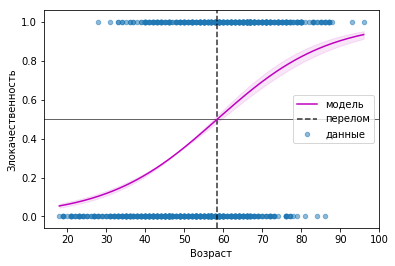

In [23]:
D.plot('age','itog', kind='scatter', alpha=.5, label='данные');

xx = linspace(x.min(), x.max(), 200)
yy = func(xx, *popt)
plot(xx,yy, color='m', ls='-', zorder=10, label='модель');

yymax = func(xx, *(popt+perr))
yymin = func(xx, *(popt-perr))
fill_between(xx, yymin, yymax, alpha=0.1, color='m')

axvline(popt[0], color='k', ls='--', alpha=.8, label='перелом')
axhline(0.5, color='k', ls='-', lw=1, alpha=.6)

xlabel('Возраст');
ylabel('Злокачественность')
legend();

Вывод. 
Параметры логистической модели можно получить на выборке бинарных данных: из 0 и 1. 

После 58.5 лет преобладает вероятность злокачественного исхода новообразований в груди.